In [71]:
import pandas as pd
import pandas_profiling as pp
from pandas import json_normalize
import json
import numpy as np
pd.options.display.max_columns=None

In [72]:
df1 = pd.read_json('nenetskii-avtonomnyi-okrug.geojson')
df2 = pd.read_json('moskva.geojson')
df = pd.concat([df1,df2], axis = 0)
df = json_normalize(json.loads(df.to_json(orient='records')))

In [73]:
df

,type,features.type,features.geometry.type,features.geometry.coordinates,features.properties.id,features.properties.gibdd_id,features.properties.point.lat,features.properties.point.long,features.properties.participant_categories,features.properties.severity,features.properties.region,features.properties.parent_region,features.properties.datetime,features.properties.address,features.properties.participants_count,features.properties.injured_count,features.properties.dead_count,features.properties.category,features.properties.light,features.properties.nearby,features.properties.weather,features.properties.road_conditions,features.properties.vehicles,features.properties.participants,features.properties.tags,features.properties.scheme
0,FeatureCollection,Feature,Point,"[53.103822, 67.667859]",2566691,221349607,67.667859,53.103822,[Все участники],С погибшими,Ненецкий АО,Ненецкий автономный округ,2021-04-01 03:00:00,"рп Искателей, г. Нарьян-Мар - п. Искателей, 4 км",1,0,1,Съезд с дороги,"В темное время суток, освещение включено","[Жилые дома индивидуальной застройки, Остановк...",[Ясно],"[Недостатки зимнего содержания, Гололедица]","[{'brand': 'ВАЗ', 'model': 'ВАЗ 2131 и модифик...",[],[Дорожно-транспортные происшествия],610
1,FeatureCollection,Feature,Point,"[53.014097, 67.639032]",2548877,221293312,67.639032,53.014097,[Все участники],Легкий,Ненецкий АО,Ненецкий автономный округ,2021-02-24 13:40:00,"г Нарьян-Мар, ул Первомайская, 34",4,2,0,Столкновение,Светлое время суток,"[Многоквартирные жилые дома, Выезд с прилегающ...",[Пасмурно],"[Недостатки зимнего содержания, Гололедица]","[{'brand': 'TOYOTA', 'model': 'Corolla', 'colo...",[],[Дорожно-транспортные происшествия],420
2,FeatureCollection,Feature,Point,"[53.111397, 67.6666]",2557589,221345761,67.666600,53.111397,[Все участники],Тяжёлый,Ненецкий АО,Ненецкий автономный округ,2021-03-29 20:43:00,"рп Искателей, ул Юбилейная, 80 А",3,2,0,Столкновение,"В темное время суток, освещение включено","[Многоквартирные жилые дома, Выезд с прилегающ...",[Пасмурно],"[Недостатки зимнего содержания, Гололедица]","[{'brand': 'GREAT WALL', 'model': 'Прочие моде...",[],[Дорожно-транспортные происшествия],200
3,FeatureCollection,Feature,Point,"[56.498694, 67.193771]",2557591,221337139,67.193771,56.498694,[Все участники],Легкий,Ненецкий АО,Ненецкий автономный округ,2021-03-22 15:00:00,"г. Нарьян-Мар - г. Усинск, участок г. Нарьян-М...",2,1,0,Столкновение,Светлое время суток,[Нерегулируемый перекрёсток неравнозначных ули...,[Ясно],[Обработанное противогололедными материалами],"[{'brand': 'MAN', 'model': 'TGA', 'color': 'Бе...",[],[Дорожно-транспортные происшествия],410
4,FeatureCollection,Feature,Point,"[53.051348, 67.653941]",2548878,221253486,67.653941,53.051348,[Все участники],Тяжёлый,Ненецкий АО,Ненецкий автономный округ,2021-02-02 10:43:00,"г Нарьян-Мар, ул Юбилейная, 6",3,1,0,Столкновение,Светлое время суток,"[Мост, эстакада, путепровод]","[Пасмурно, Метель]","[Недостатки зимнего содержания, Со снежным нак...","[{'brand': 'NISSAN', 'model': 'Almera', 'color...",[],[Дорожно-транспортные происшествия],070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57338,FeatureCollection,Feature,Point,"[37.222163, 55.990395]",1576693,199851663,55.990395,37.222163,"[Дети, Велосипедисты, Все участники]",Тяжёлый,Савёлки,Москва,2016-09-21 15:25:00,"г Зеленоград, пл Центральная, 1",2,1,0,Наезд на велосипедиста,Светлое время суток,"[Многоквартирные жилые дома, Административные ...",[Пасмурно],"[Мокрое, Отсутствие, плохая различимость гориз...","[{'brand': 'HYUNDAI', 'model': 'Прочие модели ...",[],"[Дорожно-транспортные происшествия, ДТП и пост...",500
57339,FeatureCollection,Feature,Point,"[37.455556, 55.780833]",1556190,178885379,55.780833,37.455556,[Все участники],Легкий,Щукино,Москва,2015-10-03 16:30:00,"г Москва, ул Живописная, 3",3,1,0,Столкновение,Светлое время суток,"[Многоквартирные жилые дома, Выезд с прилегающ...",[Ясно],[Сухое],"[{'brand': 'VOLKS

In [74]:
df.drop([
    'features.properties.vehicles', 'features.properties.participants',
    'features.properties.participant_categories',
    'features.properties.severity', 'features.geometry.coordinates',
    'features.properties.tags', 'features.properties.scheme',
    'features.properties.category', 'features.properties.participants_count',
    'features.geometry.type', 'features.type', 'type', 'features.properties.id'
],
        axis=1,
        inplace=True)

In [75]:
df

,features.properties.gibdd_id,features.properties.point.lat,features.properties.point.long,features.properties.region,features.properties.parent_region,features.properties.datetime,features.properties.address,features.properties.injured_count,features.properties.dead_count,features.properties.light,features.properties.nearby,features.properties.weather,features.properties.road_conditions
0,221349607,67.667859,53.103822,Ненецкий АО,Ненецкий автономный округ,2021-04-01 03:00:00,"рп Искателей, г. Нарьян-Мар - п. Искателей, 4 км",0,1,"В темное время суток, освещение включено","[Жилые дома индивидуальной застройки, Остановк...",[Ясно],"[Недостатки зимнего содержания, Гололедица]"
1,221293312,67.639032,53.014097,Ненецкий АО,Ненецкий автономный округ,2021-02-24 13:40:00,"г Нарьян-Мар, ул Первомайская, 34",2,0,Светлое время суток,"[Многоквартирные жилые дома, Выезд с прилегающ...",[Пасмурно],"[Недостатки зимнего содержания, Гололедица]"
2,221345761,67.666600,53.111397,Ненецкий АО,Ненецкий автономный округ,2021-03-29 20:43:00,"рп Искателей, ул Юбилейная, 80 А",2,0,"В темное время суток, освещение включено","[Многоквартирные жилые дома, Выезд с прилегающ...",[Пасмурно],"[Недостатки зимнего содержания, Гололедица]"
3,221337139,67.193771,56.498694,Ненецкий АО,Ненецкий автономный округ,2021-03-22 15:00:00,"г. Нарьян-Мар - г. Усинск, участок г. Нарьян-М...",1,0,Светлое время суток,[Нерегулируемый перекрёсток неравнозначных ули...,[Ясно],[Обработанное противогололедными материалами]
4,221253486,67.653941,53.051348,Ненецкий АО,Ненецкий автономный округ,2021-02-02 10:43:00,"г Нарьян-Мар, ул Юбилейная, 6",1,0,Светлое время суток,"[Мост, эстакада, путепровод]","[Пасмурно, Метель]","[Недостатки зимнего содержания, Со снежным нак..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57338,199851663,55.990395,37.222163,Савёлки,Москва,2016-09-21 15:25:00,"г Зеленоград, пл Центральная, 1",1,0,Светлое время суток,"[Многоквартирные жилые дома, Административные ...",[Пасмурно],"[Мокрое, Отсутствие, плохая различимость гориз..."
57339,178885379,55.780833,37.455556,Щукино,Москва,2015-10-03 16:30:00,"г Москва, ул Живописная, 3",1,0,Светлое время суток,"[Многоквартирные жилые дома, Выезд с прилегающ...",[Ясно],[Сухое]
57340,208339747,55.788000,37.559000,Беговой,Москва,2017-12-26 04:10:00,"г Москва, пр-кт Ленинградский",1,0,"В темное время суток, освещение включено",[Многоквартирные жилые дома],[Пасмурно],[Обработанное противогололедными материалами]
57341,192972843,55.867000,37.664000,Бабушкинский,Москва,2016-04-28 08:25:00,"г Москва, ул Енисейская, 20",1,0,Светлое время суток,[Многоквартирные жилые дома],[Пасмурно],[Сухое]


In [76]:
df.loc[df['features.properties.address'].isnull(),
       'features.properties.address'] = df.loc[
           df['features.properties.address'].isnull()].index

In [77]:
df['count'] = df.groupby('features.properties.address'
                         )['features.properties.address'].transform('count')

In [78]:
df['inj_sum'] = df.groupby(
    by='features.properties.address',
   )['features.properties.injured_count'].transform(
        lambda x: np.sum(x.values))

df['death_sum'] = df.groupby(
    by='features.properties.address',
    )['features.properties.dead_count'].transform(
        lambda x: np.sum(x.values))

In [79]:
df.drop(['features.properties.injured_count','features.properties.dead_count' ], axis = 1, inplace=True)

In [80]:
def droplist(frame=df, coll=['features.properties.nearby','features.properties.road_conditions', 'features.properties.weather' ]):
    for col in coll:
        frame[col] = frame[col].apply(lambda x : ','.join(x))
    return frame


In [81]:
df = droplist()

In [82]:
df

,features.properties.gibdd_id,features.properties.point.lat,features.properties.point.long,features.properties.region,features.properties.parent_region,features.properties.datetime,features.properties.address,features.properties.light,features.properties.nearby,features.properties.weather,features.properties.road_conditions,count,inj_sum,death_sum
0,221349607,67.667859,53.103822,Ненецкий АО,Ненецкий автономный округ,2021-04-01 03:00:00,"рп Искателей, г. Нарьян-Мар - п. Искателей, 4 км","В темное время суток, освещение включено","Жилые дома индивидуальной застройки,Остановка ...",Ясно,"Недостатки зимнего содержания,Гололедица",1,0,1
1,221293312,67.639032,53.014097,Ненецкий АО,Ненецкий автономный округ,2021-02-24 13:40:00,"г Нарьян-Мар, ул Первомайская, 34",Светлое время суток,"Многоквартирные жилые дома,Выезд с прилегающей...",Пасмурно,"Недостатки зимнего содержания,Гололедица",1,2,0
2,221345761,67.666600,53.111397,Ненецкий АО,Ненецкий автономный округ,2021-03-29 20:43:00,"рп Искателей, ул Юбилейная, 80 А","В темное время суток, освещение включено","Многоквартирные жилые дома,Выезд с прилегающей...",Пасмурно,"Недостатки зимнего содержания,Гололедица",1,2,0
3,221337139,67.193771,56.498694,Ненецкий АО,Ненецкий автономный округ,2021-03-22 15:00:00,"г. Нарьян-Мар - г. Усинск, участок г. Нарьян-М...",Светлое время суток,Нерегулируемый перекрёсток неравнозначных улиц...,Ясно,Обработанное противогололедными материалами,1,1,0
4,221253486,67.653941,53.051348,Ненецкий АО,Ненецкий автономный округ,2021-02-02 10:43:00,"г Нарьян-Мар, ул Юбилейная, 6",Светлое время суток,"Мост, эстакада, путепровод","Пасмурно,Метель","Недостатки зимнего содержания,Со снежным накатом",7,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57338,199851663,55.990395,37.222163,Савёлки,Москва,2016-09-21 15:25:00,"г Зеленоград, пл Центральная, 1",Светлое время суток,"Многоквартирные жилые дома,Административные зд...",Пасмурно,"Мокрое,Отсутствие, плохая различимость горизон...",3,3,0
57339,178885379,55.780833,37.455556,Щукино,Москва,2015-10-03 16:30:00,"г Москва, ул Живописная, 3",Светлое время суток,"Многоквартирные жилые дома,Выезд с прилегающей...",Ясно,Сухое,3,4,0
57340,208339747,55.788000,37.559000,Беговой,Москва,2017-12-26 04:10:00,"г Москва, пр-кт Ленинградский","В темное время суток, освещение включено",Многоквартирные жилые дома,Пасмурно,Обработанное противогололедными материалами,2,1,1
57341,192972843,55.867000,37.664000,Бабушкинский,Москва,2016-04-28 08:25:00,"г Москва, ул Енисейская, 20",Светлое время суток,Многоквартирные жилые дома,Пасмурно,Сухое,1,1,0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57343 entries, 0 to 57342
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   features.properties.gibdd_id         57343 non-null  object 
 1   features.properties.point.lat        57260 non-null  float64
 2   features.properties.point.long       57260 non-null  float64
 3   features.properties.region           57343 non-null  object 
 4   features.properties.parent_region    57343 non-null  object 
 5   features.properties.datetime         57343 non-null  object 
 6   features.properties.address          57343 non-null  object 
 7   features.properties.light            57343 non-null  object 
 8   features.properties.nearby           57343 non-null  object 
 9   features.properties.weather          57343 non-null  object 
 10  features.properties.road_conditions  57343 non-null  object 
 11  count                       

In [84]:
addColumns = ['features.properties.light', 'features.properties.address','features.properties.nearby','features.properties.road_conditions', 'features.properties.weather']

df['feat'] = df[addColumns].astype(str).apply(lambda x: ','.join(x), axis=1)


In [85]:
df.drop(addColumns, axis=1, inplace=True)

In [86]:
import nltk
from nltk.corpus import stopwords
#Сама функция
def clean_data(df):
    df = df.str.lower()
    df.replace(r'[^а-яА-Яa-zA-Z0-9]', ' ', regex = True, inplace = True)
    stop_words = stopwords.words("russian")
    df = df.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
    return df

df['feat']=clean_data(df['feat'])

In [87]:
df.drop(['features.properties.gibdd_id'], axis=1, inplace=True)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57343 entries, 0 to 57342
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   features.properties.point.lat      57260 non-null  float64
 1   features.properties.point.long     57260 non-null  float64
 2   features.properties.region         57343 non-null  object 
 3   features.properties.parent_region  57343 non-null  object 
 4   features.properties.datetime       57343 non-null  object 
 5   count                              57343 non-null  int64  
 6   inj_sum                            57343 non-null  int64  
 7   death_sum                          57343 non-null  int64  
 8   feat                               57343 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 3.9+ MB


In [89]:
df.dropna(axis=0, inplace=True)

## 2 session


In [90]:
from nltk.tokenize import word_tokenize

In [91]:
# Трансформаторы для получения данных
from sklearn.base import BaseEstimator, TransformerMixin
# Конвеер для объединения шагов выполнения классификации
from sklearn.pipeline import Pipeline
# Функция стандартизации числовых значений
from sklearn.preprocessing import StandardScaler
# Функция преобразования текстовых данных под модель
from sklearn.feature_extraction.text import TfidfVectorizer

# Класс необходимый для получения и работы с текстовыми признаками
class TextSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.key]
    
# Класс необходимый для получения работы с числовыми признаками
class NumericalSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[[self.key]]

$f(n) = \sum_{i=1}^{n}i4\sum_{i=1}^{n}d$


In [92]:
df['interaction'] = df['inj_sum']+4*df['death_sum']
df.drop(['inj_sum', 'death_sum'], axis=1, inplace=True)

In [96]:
#feat
feat = Pipeline([
    ('selector', TextSelector(key="feat")),
    ('tfidf', TfidfVectorizer(stop_words = stopwords.words('russian')))
    ])

feat.fit_transform(df)

<57260x8158 sparse matrix of type '<class 'numpy.float64'>'
	with 1139055 stored elements in Compressed Sparse Row format>

In [94]:
#num
num = Pipeline([
    ('selector', NumericalSelector(key="interaction")),
    ('tfidf', StandardScaler())
    ])

num.fit_transform(df)

array([[-0.27311613],
       [-0.46737034],
       [-0.46737034],
       ...,
       [-0.17598902],
       [-0.56449745],
       [-0.56449745]])

In [97]:
from sklearn.pipeline import FeatureUnion
feat = FeatureUnion([('feat', feat),
                    ("num", num)])


try:
    X = feat.fit_transform(df.drop(columns = df.iloc[:,:5], axis = 1))
except Exception:
    print("я додик")

In [98]:
df #.drop(columns = df.iloc[:,:5], axis = 1)

,features.properties.point.lat,features.properties.point.long,features.properties.region,features.properties.parent_region,features.properties.datetime,count,feat,interaction
0,67.667859,53.103822,Ненецкий АО,Ненецкий автономный округ,2021-04-01 03:00:00,1,темное время суток освещение включено рп искат...,4
1,67.639032,53.014097,Ненецкий АО,Ненецкий автономный округ,2021-02-24 13:40:00,1,светлое время суток г нарьян мар ул первомайск...,2
2,67.666600,53.111397,Ненецкий АО,Ненецкий автономный округ,2021-03-29 20:43:00,1,темное время суток освещение включено рп искат...,2
3,67.193771,56.498694,Ненецкий АО,Ненецкий автономный округ,2021-03-22 15:00:00,1,светлое время суток г нарьян мар г усинск учас...,1
4,67.653941,53.051348,Ненецкий АО,Ненецкий автономный округ,2021-02-02 10:43:00,7,светлое время суток г нарьян мар ул юбилейная ...,9
...,...,...,...,...,...,...,...,...
57338,55.990395,37.222163,Савёлки,Москва,2016-09-21 15:25:00,3,светлое время суток г зеленоград пл центральна...,3
57339,55.780833,37.455556,Щукино,Москва,2015-10-03 16:30:00,3,светлое время суток г москва ул живописная 3 м...,4
57340,55.788000,37.559000,Беговой,Москва,2017-12-26 04:10:00,2,темное время суток освещение включено г москва...,5
57341,55.867000,37.664000,Бабушкинский,Москва,2016-04-28 08:25:00,1,светлое время суток г москва ул енисейская 20 ...,1


In [99]:
from sklearn.cluster import KMeans
clust = KMeans(random_state=7, n_clusters=3, max_iter=1000)

In [100]:
df['y'] = clust.fit_predict(X)

In [101]:
df['y'].value_counts()

0    47327
1     8437
2     1496
Name: y, dtype: int64

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
test, train =train_test_split(df, stratify=df['features.properties.region']) 

In [108]:
test['features.properties.region'].value_counts()

Люблино                          662
Выхино-Жулебино                  628
Южное Бутово                     617
Спецтрассы                       595
Гольяново                        589
                                ... 
Михайлово-Ярцевское поселение     50
Воскресенское                     35
Кокошкино                         20
Поселок Восточный                 16
Мосрентген                        12
Name: features.properties.region, Length: 148, dtype: int64

In [109]:
train['features.properties.region'].value_counts()

Люблино                          221
Выхино-Жулебино                  210
Южное Бутово                     206
Спецтрассы                       198
Гольяново                        197
                                ... 
Михайлово-Ярцевское поселение     16
Воскресенское                     12
Кокошкино                          7
Поселок Восточный                  6
Мосрентген                         4
Name: features.properties.region, Length: 148, dtype: int64

# Session 3

<AxesSubplot:xlabel='interaction', ylabel='interaction'>

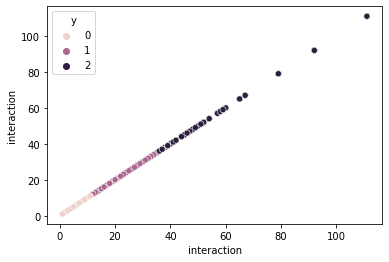

In [110]:
sns.scatterplot(x=df['interaction'], y=df['interaction'], c=df['y'], hue=df['y'])

In [117]:
c = df.drop(df.iloc[:,0:5], axis =1).corr()

In [118]:
c

,count,interaction,y
count,1.000000,0.95646,0.858753
interaction,0.956460,1.00000,0.882250
y,0.858753,0.88225,1.000000


<AxesSubplot:>

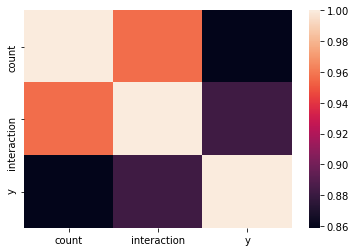

In [119]:
sns.heatmap(c)

In [122]:
!pip install wordcloud

In [123]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline 

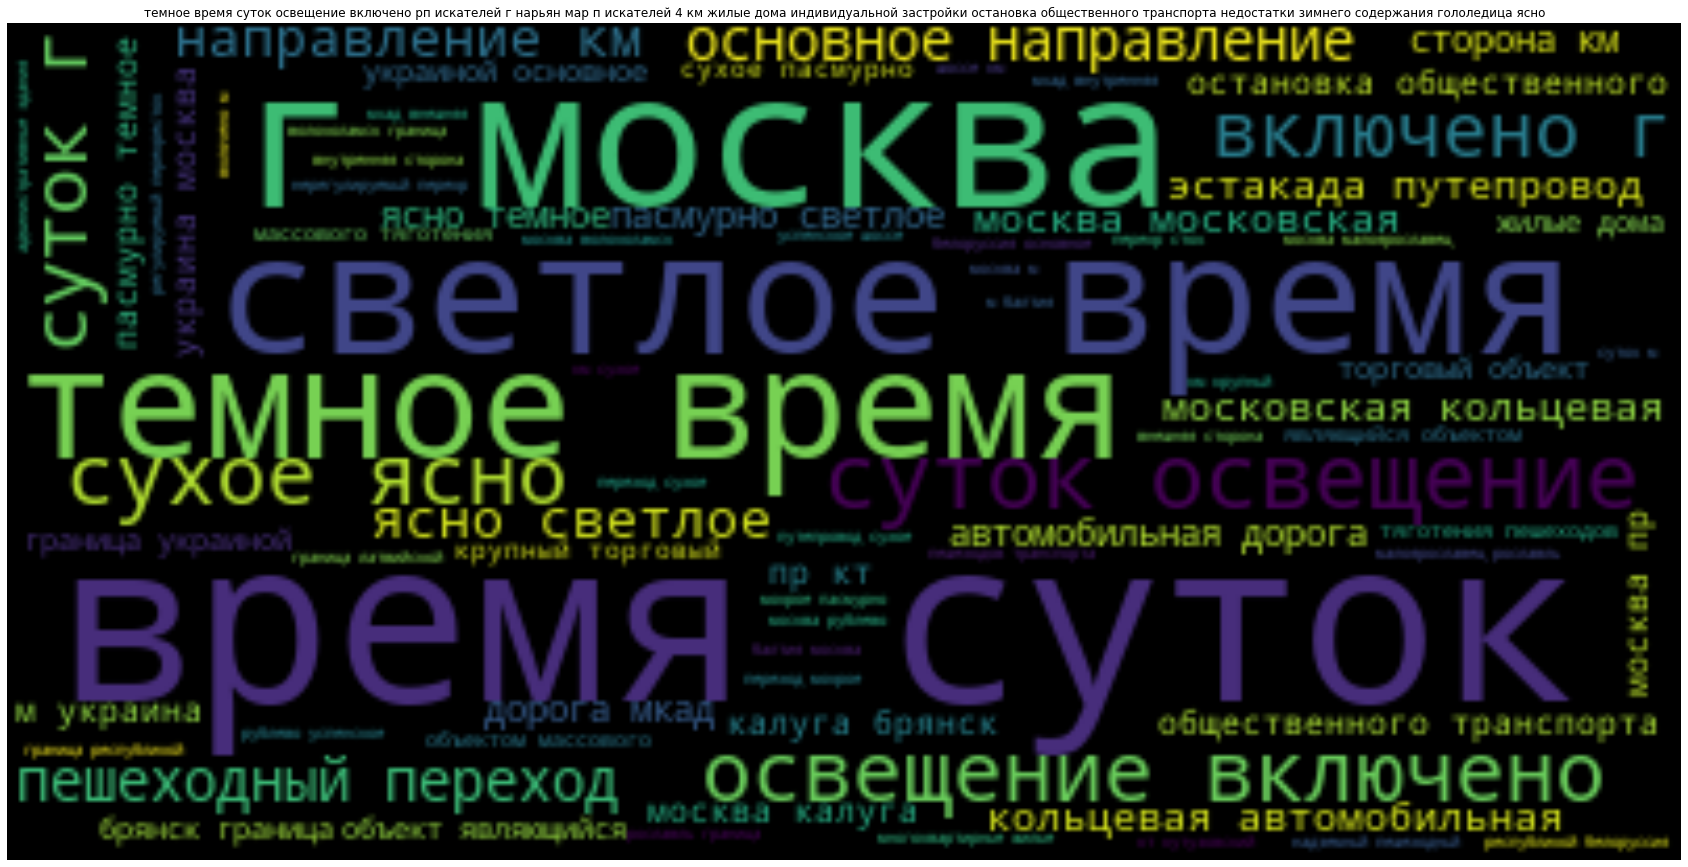

In [128]:
text1 = " ".join(feat for feat in df[df['y']==2].feat)
plt.figure(figsize = (30, 30))
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text1)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(df["feat"][0])
plt.axis("off")
plt.show()

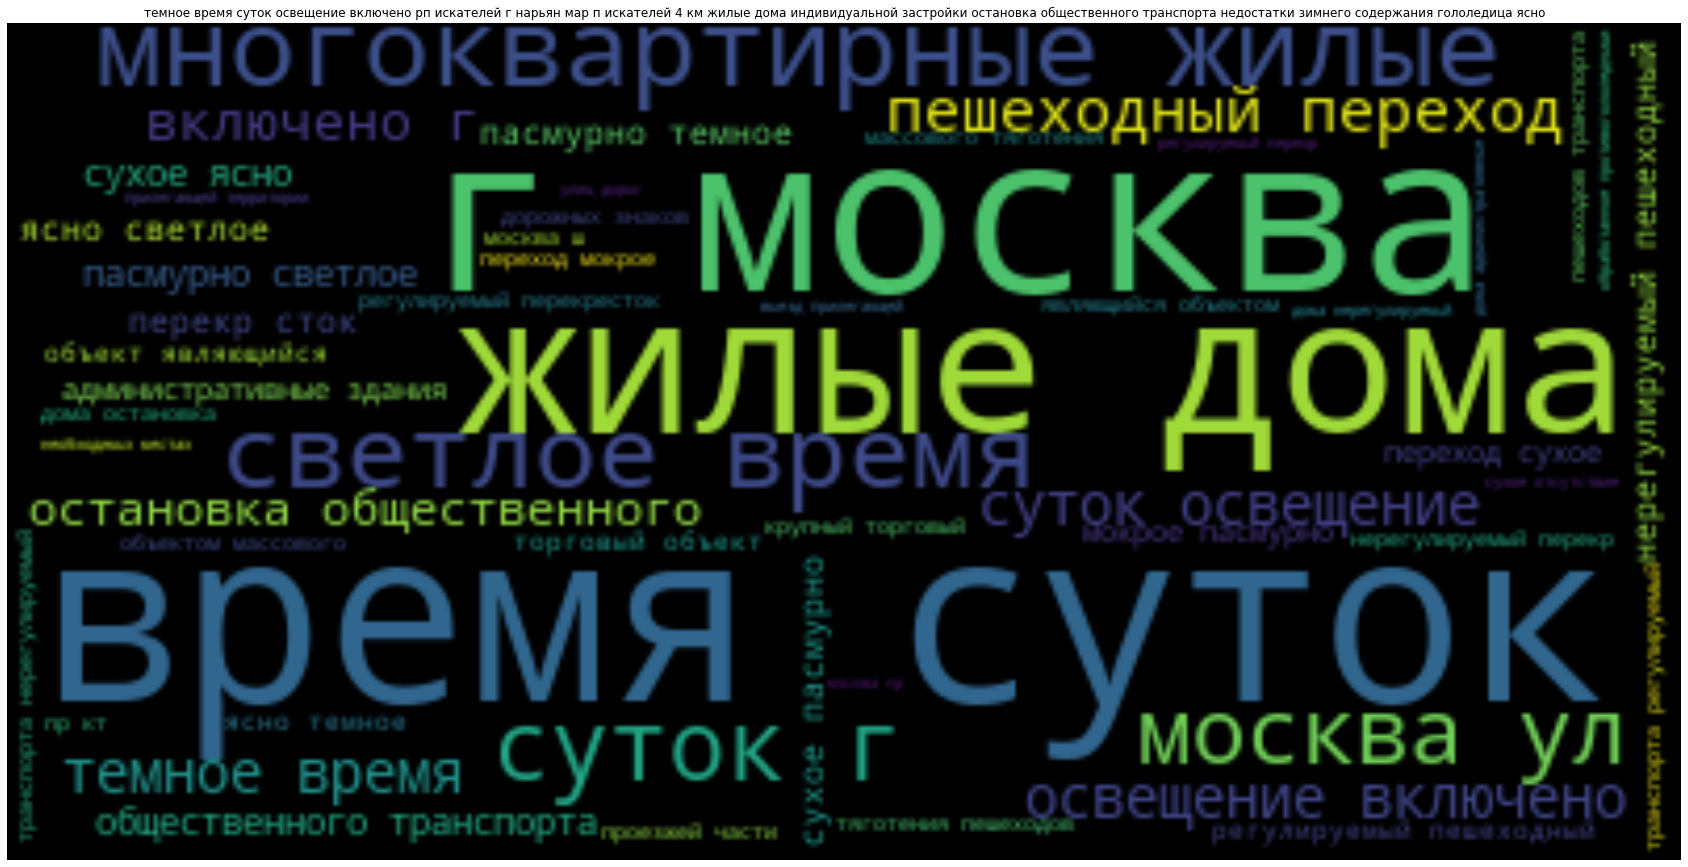

In [129]:
text1 = " ".join(feat for feat in df[df['y']==0].feat)
plt.figure(figsize = (30, 30))
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text1)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(df["feat"][0])
plt.axis("off")
plt.show()

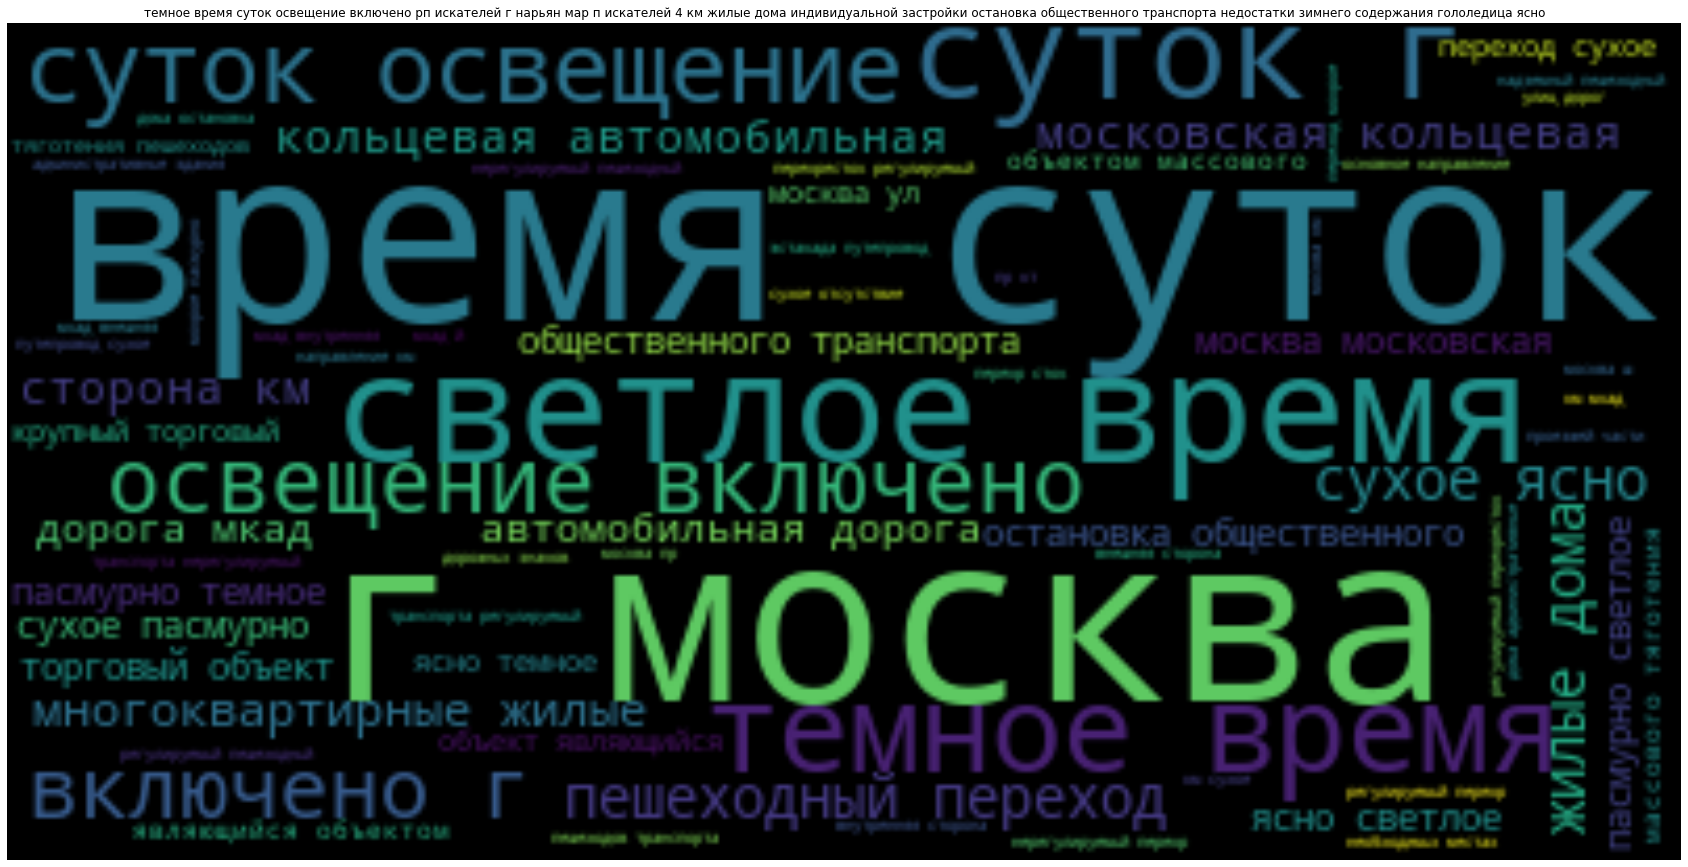

In [130]:
text1 = " ".join(feat for feat in df[df['y']==1].feat)
plt.figure(figsize = (30, 30))
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text1)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(df["feat"][0])
plt.axis("off")
plt.show()

## классификация


In [144]:

y = df['y'].array

In [137]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

In [139]:
#feat
feat = Pipeline([
    ('selector', TextSelector(key="feat")),
    ('tfidf', TfidfVectorizer(stop_words = stopwords.words('russian')))
    ])

feat.fit_transform(df)

<57260x8158 sparse matrix of type '<class 'numpy.float64'>'
	with 1139055 stored elements in Compressed Sparse Row format>

In [140]:
#num
num = Pipeline([
    ('selector', NumericalSelector(key="interaction")),
    ('tfidf', StandardScaler())
    ])

num.fit_transform(df)

array([[-0.27311613],
       [-0.46737034],
       [-0.46737034],
       ...,
       [-0.17598902],
       [-0.56449745],
       [-0.56449745]])

In [141]:
from sklearn.pipeline import FeatureUnion
feat = FeatureUnion([('feat', feat),
                    ("num", num)])


try:
    X = feat.fit_transform(df.drop(columns = df.iloc[:,:5], axis = 1))
except Exception:
    print("я додик")

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=df['features.properties.region'], shuffle=True)

In [146]:
val_score = []
train_score = []
estim = [10,100,500]
for est in estim:
    rfc = RandomForestClassifier(n_estimators=est)
    rfc.fit(X_train,y_train)
    val_score.append(rfc.score(X_test,y_test))
    train_score.append(rfc.score(X_train,y_train))

In [147]:
val_score,\
train_score

([0.9337757596926302, 0.9734544184421935, 0.9781348236115962],
 [0.9972755850506462, 1.0, 1.0])

In [148]:
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11789
           1       0.93      0.94      0.93      2148
           2       0.89      0.64      0.74       378

    accuracy                           0.98     14315
   macro avg       0.93      0.86      0.89     14315
weighted avg       0.98      0.98      0.98     14315



In [149]:
val_score = []
train_score = []
neigneighbors  = [1,2,3,5,10, 15, 20]
for n in neigneighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    val_score.append(knn.score(X_test,y_test))
    train_score.append(knn.score(X_train,y_train))

In [150]:
val_score,\
train_score

([0.9951798812434509,
  0.9943415997205728,
  0.9959483059727559,
  0.9958784491791827,
  0.9929444638491093,
  0.9934334614041216,
  0.9914076143904995],
 [1.0,
  0.9973454418442194,
  0.9983001513563861,
  0.9979508673885202,
  0.9962975899406217,
  0.995505879613459,
  0.9942717429269996])

In [151]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11789
           1       1.00      0.95      0.97      2148
           2       1.00      1.00      1.00       378

    accuracy                           0.99     14315
   macro avg       1.00      0.98      0.99     14315
weighted avg       0.99      0.99      0.99     14315



In [152]:
val_score = []
train_score = []
estim = [10,100,500]
for est in estim:
    gb = GradientBoostingClassifier(n_estimators=est)
    gb.fit(X_train,y_train)
    val_score.append(gb.score(X_test,y_test))
    train_score.append(gb.score(X_train,y_train))
val_score,\
train_score

([0.9998602864128536, 0.9999301432064268, 0.9999301432064268],
 [0.9999767144021423, 1.0, 1.0])

In [153]:
print(classification_report(y_test, gb.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11789
           1       1.00      1.00      1.00      2148
           2       1.00      1.00      1.00       378

    accuracy                           1.00     14315
   macro avg       1.00      1.00      1.00     14315
weighted avg       1.00      1.00      1.00     14315



## Map


In [154]:
import scipy
import geoplotlib

In [156]:
df.rename(columns={'features.properties.point.lat':'lat', 'features.properties.point.long':'lon'}, inplace=True)

In [157]:
geoplotlib.scatter(df[df['y']==0], color='g')
geoplotlib.scatter(df[df['y']==1], color='b')
geoplotlib.scatter(df[df['y']==2], color='r')
geoplotlib.show()

1633363333227.png saved


<img src='1633363333227.png'>

In [159]:
!pip install nbconvert
